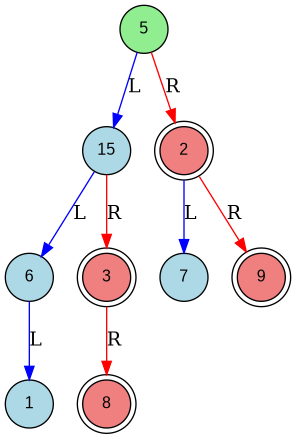

In [30]:
from graphviz import Digraph
from IPython.display import Image, display

def visualize_tree(root):
    dot = Digraph()

    # 🧩 Graph-wide settings
    dot.graph_attr.update(
        size="8,6",          # width, height in inches — moderate
        dpi="96",            # image resolution
        rankdir="TB",        # TB = top-bottom layout
    )

    # 📌 Node appearance
    dot.node_attr.update(
        fontname="Arial",
        fontsize="12",       # readable font size
        width="0.5",         # node width
        height="0.5",        # node height
        fixedsize="true",    # keeps node size consistent
        style="filled"
    )

    def add_nodes_edges(node, parent=None, is_left=False):
        if node:
            node_id = str(id(node))

            # Node style
            if node == root:
                fillcolor = "lightgreen"
                shape = "circle"
            elif is_left:
                fillcolor = "lightblue"
                shape = "circle"
            else:
                fillcolor = "lightcoral"
                shape = "doublecircle"

            dot.node(node_id, str(node.val), fillcolor=fillcolor, shape=shape)

            if parent:
                parent_id = str(id(parent))
                edge_color = "blue" if is_left else "red"
                label = "L" if is_left else "R"
                dot.edge(parent_id, node_id, color=edge_color, label=label)

            add_nodes_edges(node.left, node, True)
            add_nodes_edges(node.right, node, False)

    add_nodes_edges(root)
    dot.format = 'png'
    dot.render('tree', cleanup=True)
    display(Image(filename='tree.png'))



# 🧪 Example tree
t1 = TreeNode(5)
t1.left = TreeNode(15)
t1.right = TreeNode(2)
t1.left.left = TreeNode(6)
t1.left.right = TreeNode(3)

# Adding more nodes
t1.right.left = TreeNode(7)
t1.right.right = TreeNode(9)
t1.left.left.left = TreeNode(1)
t1.left.right.right = TreeNode(8)
visualize_tree(t1)


Pre-order DFS traversal:
5
15
6
1
3
8
2
7
9


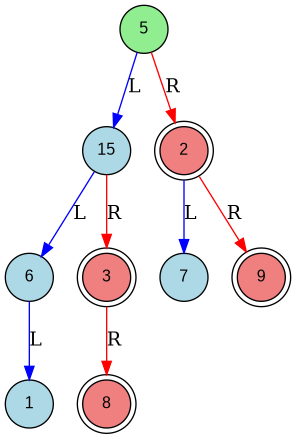

In [31]:
# Pre-order: Root → Left → Right
def dfs(self):
    print(self.val)
    if self.left:
        self.left.dfs()
    if self.right:
        self.right.dfs()
TreeNode.dfs = dfs

print("Pre-order DFS traversal:")
t1.dfs()
visualize_tree(t1)




In [36]:
# In-order DFS: Left → Root → Right
def dfs_inorder(self):
    if self.left:
        self.left.dfs_inorder()  # ✅ must match function name
    
    print(self.val)  # Root
    
    if self.right:
        self.right.dfs_inorder()  # ✅ must match function name

# Attach to TreeNode
TreeNode.dfs_inorder = dfs_inorder


1
6
15
3
8
5
7
2
9


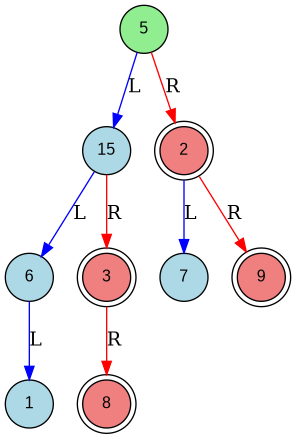

In [38]:
t1.dfs_inorder()
visualize_tree(t1)


1
6
15
3
8
5
7
2
9


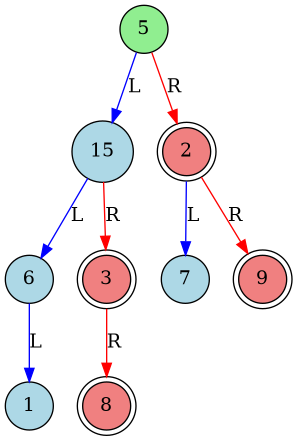

In [11]:
t1.dfs_in_order()
#visuallize
visualize_tree(t1)

In [40]:
# Post-order DFS: Left → Right → Root
def dfs_postorder(self):
    if self.left:
        self.left.dfs_postorder()  # ✅ consistent function name

    if self.right:
        self.right.dfs_postorder()  # ✅ consistent function name

    print(self.val)  # Root last
TreeNode.dfs_postorder = dfs_postorder


1
6
8
3
15
7
9
2
5


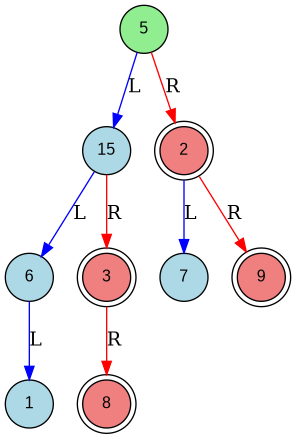

In [42]:
t1.dfs_postorder()
visualize_tree(t1)


In [43]:
#bredth first search
def bfs(self):
    
    to_vist= [self]  # Start with the root
    while to_vist:
        current = to_vist.pop(0) #get the first element in the list
        print(current.val)  # Process the current node
        
        if current.left:
            to_vist.append(current.left)
        if current.right:
            to_vist.append(current.right)

TreeNode.bfs = bfs

5
15
2
6
3
7
9
1
8


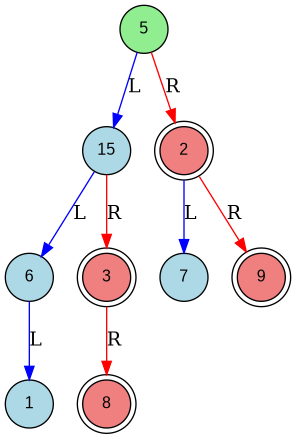

In [44]:
t1.bfs()
visualize_tree(t1)

In [45]:
#sum
class PerformSum:
    def __init__(self):
        self.sum=0
        
    def process(self,node):
        self.sum+=node.val
        
    def get_sum(self):
        return self.sum
    
    def reset_sum(self):
        self.sum = 0
        
p=PerformSum()

In [47]:
def dfs_apply(self,fn):
    fn(self)  # Apply the function to the current node
    if self.left:
        self.left.dfs_apply(fn)  # Recur on left child
    if self.right:
        self.right.dfs_apply(fn)  # Recur on right child
TreeNode.dfs_apply = dfs_apply

In [49]:
p.reset_sum()
t1.dfs_apply(p.process)
print("Sum of all nodes:", p.get_sum())

Sum of all nodes: 56
